In [15]:
import requests

# Note the dl=1 for direct download
url = 'https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=1'

# Send a GET request to the URL
response = requests.get(url)

# Open the file in write binary mode and write the contents
with open('dataset.zip', 'wb') as file:
    file.write(response.content)

print("Download completed!")

Download completed!


In [16]:
import zipfile

# Replace with the path to your zip file
zip_file_path = 'dataset.zip'

# Replace with the path where you want to extract the files
extraction_directory = 'dataset'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the directory
    zip_ref.extractall(extraction_directory)

print("Extraction completed!")

Extraction completed!


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.metrics import Precision, Recall
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

#  Building our Model To train the data 

In [48]:
# Working with pre trained model 
from keras.layers import BatchNormalization




base_model = MobileNet(input_shape=(224, 224, 3), include_top=False)



for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers
    layer.trainable = True

x = Flatten()(base_model.output)
x = Dropout(0.5)(x)  # Dropout layer
x = Dense(units=7, activation='softmax')(x)
x = Flatten()(base_model.output)
x = BatchNormalization()(x)  # Add Batch Normalization after flattening
x = Dense(units=7, activation='softmax')(x)

model = Model(base_model.input, x)

In [49]:
model.compile(
    optimizer=SGD(learning_rate=0.0001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Preparing our data using data generator

In [50]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Match MobileNet preprocessing
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



train_data = train_datagen.flow_from_directory(directory="dataset/train",


                                               target_size=(224,224), 


                                               batch_size=32,


                                  )




train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [51]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory="dataset/test",
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

val_data.class_indices

Found 7178 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

# visualizaing the data that is fed to train data gen

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


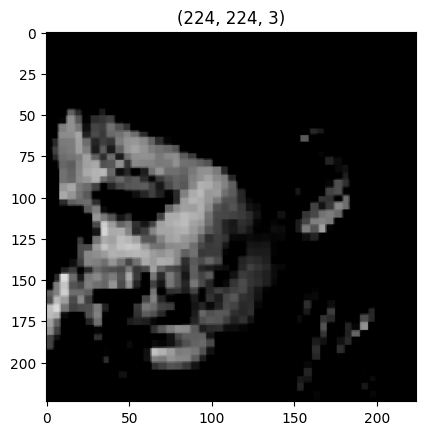

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


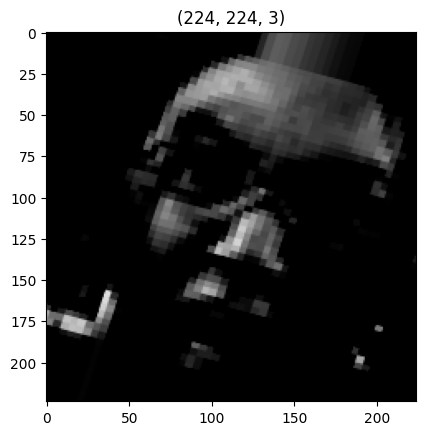

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


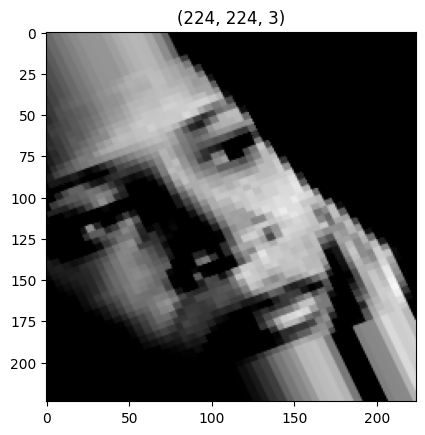

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


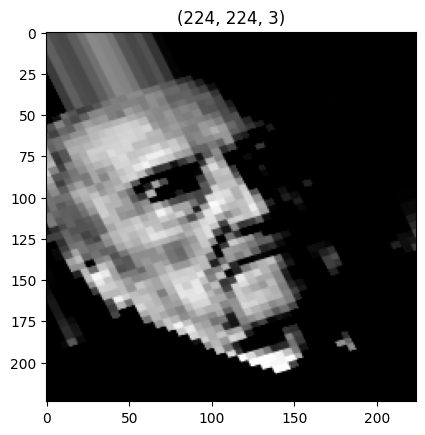

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


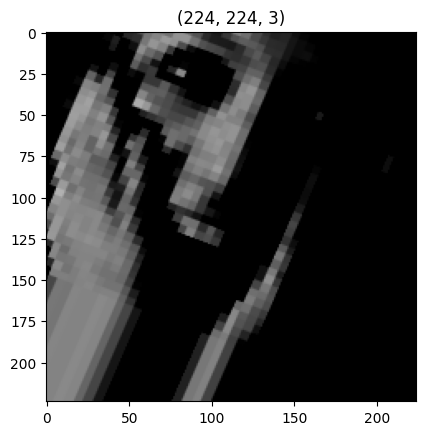

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


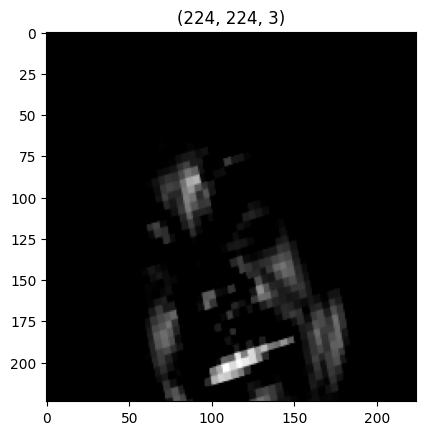

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


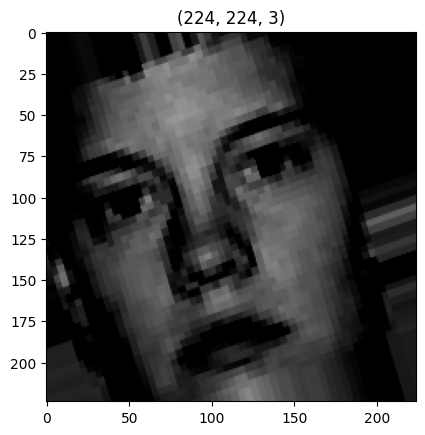

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


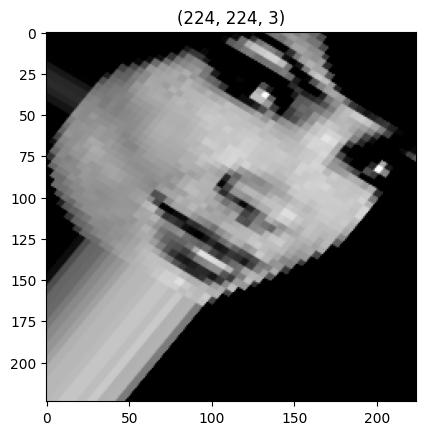

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


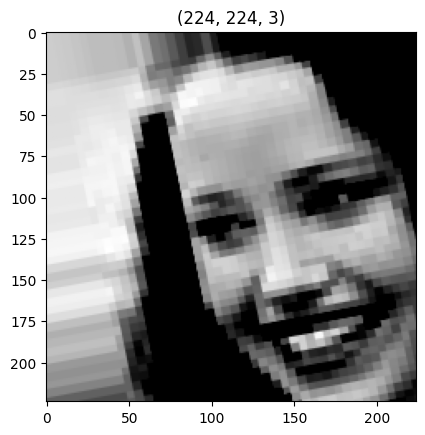

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


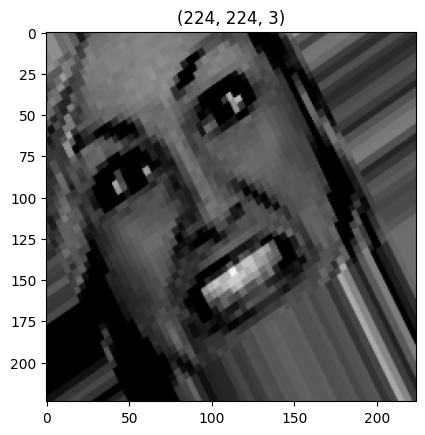

In [52]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [53]:
from sklearn.utils.class_weight import compute_class_weight

# Assuming train_data is your training data generator
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# having early stopping and model check point

In [54]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',verbose=1, save_best_only=True, mode='auto')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)

callbacks_list = [es, mc, reduce_lr]

In [55]:
hist = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=30,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size,
    class_weight=class_weights_dict,  # Use class weights for imbalance
    callbacks=callbacks_list
)

Epoch 1/30
897/897 [==============================] - ETA: 0s - loss: 2.2077 - accuracy: 0.2753
Epoch 1: val_accuracy improved from -inf to 0.34654, saving model to best_model.h5


C:\Users\Munieb AWAD\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


897/897 [==============================] - 1654s 2s/step - loss: 2.2077 - accuracy: 0.2753 - val_loss: 2.2124 - val_accuracy: 0.3465 - lr: 1.0000e-04
Epoch 2/30
897/897 [==============================] - ETA: 0s - loss: 2.0083 - accuracy: 0.3520
Epoch 2: val_accuracy improved from 0.34654 to 0.42439, saving model to best_model.h5
897/897 [==============================] - 1573s 2s/step - loss: 2.0083 - accuracy: 0.3520 - val_loss: 1.8393 - val_accuracy: 0.4244 - lr: 1.0000e-04
Epoch 3/30
897/897 [==============================] - ETA: 0s - loss: 1.9358 - accuracy: 0.3776
Epoch 3: val_accuracy did not improve from 0.42439
897/897 [==============================] - 1517s 2s/step - loss: 1.9358 - accuracy: 0.3776 - val_loss: 2.4255 - val_accuracy: 0.3615 - lr: 1.0000e-04
Epoch 4/30
897/897 [==============================] - ETA: 0s - loss: 1.8443 - accuracy: 0.3984
Epoch 4: val_accuracy did not improve from 0.42439
897/897 [==============================] - 1495s 2s/step - loss: 1.8443 - 

KeyboardInterrupt: 

In [56]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.h5")

In [57]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'lr'])

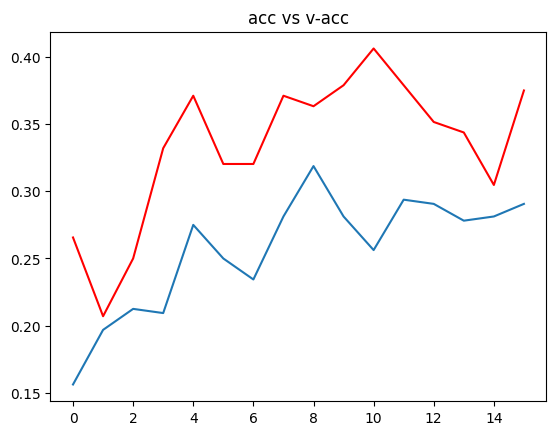

In [59]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

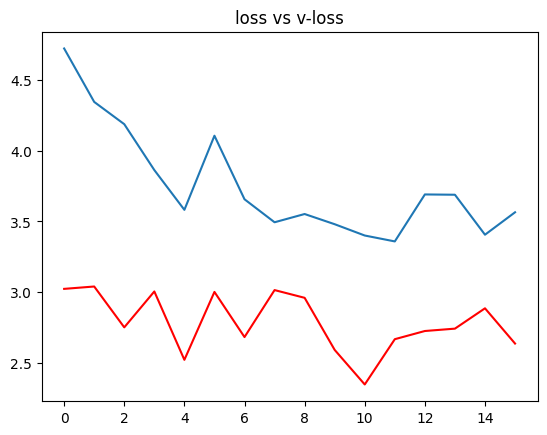

In [60]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [61]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 2s 2s/step
 the image is of happy


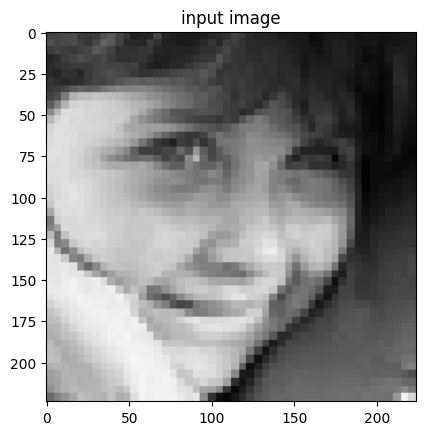

In [62]:
# path for the image to see if it predics correct class

path = "dataset/test/happy/PrivateTest_258543.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()